In [1]:
import os
import numpy as np
import scipy
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from iaml01cw2_helpers import *
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

importing Jupyter notebook from iaml01cw2_helpers.ipynb


C:\Users\wotja\miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
#--- Code for loading the data set and pre-processing --->
#load data
DataPath = os.path.join(os.getcwd(), 'data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(DataPath)

#Step 1 Make a back up of Xtrn and Xtst by copying Xtrn to Xtrn_orig and Xtst to Xtst_orig
Xtrn_orig = Xtrn.copy() #or deepcopy?
Xtst_orig = Xtst.copy()

#Step 2 Divide each element of Xtrn and Xtst by 255.0. (NB: Xtrn and Xtst are overwritten as a result.)
Xtrn = np.divide(Xtrn,255)
Xtst = np.divide(Xtst,255)
#Xtrn = Xtrn/255


#Step 3 Calculate the mean value of Xtrn for each dimension (i.e. column) and store the
#result in a vector, Xmean, whose shape is (784,).
Xmean = np.mean(Xtrn, axis=0)
#Xmean.shape

#Step 4 Subtract Xmean from each row of Xtrn and Xtst, and store the result in Xtrn_nm
#and Xtst_nm, respectively.
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [3]:
# Q2.1
def iaml01cw2_q2_1():
    #Xsmall_trn = Xtrn_nm[:2000,:] #######change to whole set later
    #Xsmall_tst = Xtst_nm[:2000,:] 
    #Ysmall_trn = Ytrn[:2000]
    #Ysmall_tst = Ytst[:2000]  

    clf = LogisticRegression().fit(Xtrn_nm, Ytrn) #fit to train data
    predtst = clf.predict(Xtst_nm) #see how it predicts tst data
    print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(Ytst,predtst)))
    
    #now using predicted labels and true labels generate conf mat
    data = {'y_Actual': Ytst,
        'y_Predicted': predtst
        }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confM = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print (confM)
    
iaml01cw2_q2_1()   # comment this out when you run the function

Classification accuracy on test set: 0.840
Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          819    3   15   50    7    4   90    1   11    0
1            5  953    4   27    5    0    3    1    2    0
2           27    4  731   11  133    0   82    2    9    1
3           31   15   14  866   33    0   37    0    4    0
4            0    3  115   38  760    2   72    0   10    0
5            2    0    0    1    0  911    0   56   10   20
6          147    3  128   46  108    0  539    0   28    1
7            0    0    0    0    0   32    0  936    1   31
8            7    1    6   11    3    7   15    5  945    0
9            0    0    0    1    0   15    1   42    0  941


In [4]:
# Q2.2
def iaml01cw2_q2_2():
    #Xtrn_nm1 = Xtrn_nm[:3000,:]
    #Ytrn1 = Ytrn[:3000]
    #Xtst_nm1 = Xtst_nm[:3000,:]
    #Ytst1 = Ytst[:3000]
    
    svm = SVC().fit(Xtrn_nm, Ytrn) #fit to training data
    predSVMtst = svm.predict(Xtst_nm) #see how it predicts tst data
    print('Classification accuracy on test set: {:.3f}'.format(accuracy_score(Ytst,predSVMtst)))
    
    #generate conf mat
    data = {'y_Actual': Ytst,
        'y_Predicted': predSVMtst
        }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confM = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print (confM)
iaml01cw2_q2_2()   # comment this out when you run the function

Classification accuracy on test set: 0.846
Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          845    2    8   51    4    4   72    0   14    0
1            4  951    7   31    5    0    1    0    1    0
2           15    2  748   11  137    0   79    0    8    0
3           32    6   12  881   26    0   40    0    3    0
4            1    0   98   36  775    0   86    0    4    0
5            0    0    0    1    0  914    0   57    2   26
6          185    1  122   39   95    0  533    0   25    0
7            0    0    0    0    0   34    0  925    0   41
8            3    1    8    5    2    4   13    4  959    1
9            0    0    0    0    0   22    0   47    1  930


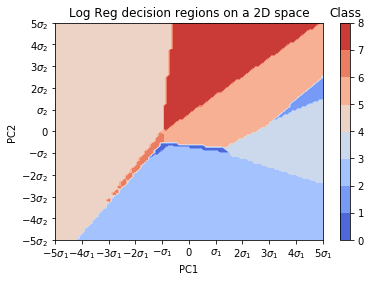

In [5]:
# Q2.3
def iaml01cw2_q2_3():
    #train model using logistic reg
    lr = LogisticRegression() 
    lr.fit(Xtrn_nm, Ytrn)

    #Find PC, var, std.dev
    pca = PCA(n_components=2)
    pca.fit(Xtrn_nm)
    comp = pca.components_
    var1 = pca.explained_variance_[0]
    var2 = pca.explained_variance_[1]
    sd1 = math.sqrt(var1)
    sd2 = math.sqrt(var2)
    
    # make 2 100x100 grids, then combine them to form new grid
    g1, g2 = np.mgrid[-5*sd1:5*sd1:0.101*sd1, -5*sd2:5*sd2:0.101*sd2]
    grid = np.vstack((g1.ravel(), g2.ravel())).T
    #print(g1.shape)
    #print(grid.shape)

    #project grid points onto new space
    xgrid = np.dot(grid, comp)
    preds = lr.predict(xgrid).reshape(g1.shape)
    #print(np.unique(preds))# nvr predicts class 9

    #plot decision regions
    fig = plt.figure()
    plt.title("Log Reg decision regions on a 2D space")
    plt.contourf(g1, g2, preds, cmap='coolwarm')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    clb = plt.colorbar()
    clb.ax.set_title('Class')

    #set axis labels,scale
    plt.xticks([-5*sd1, -4*sd1, -3*sd1, -2*sd1, -1*sd1, 0, sd1, 2*sd1, 3*sd1, 4*sd1, 5*sd1],
           ["$-5\sigma_{1}$", "$-4\sigma_{1}$", "$-3\sigma_{1}$", "$-2\sigma_{1}$", "$-\sigma_{1}$", "0", "$\sigma_{1}$", "$2\sigma_{1}$", "$3\sigma_{1}$", "$4\sigma_{1}$", "$5\sigma_{1}$"])
    plt.yticks([-5*sd2, -4*sd2, -3*sd2, -2*sd2, -1*sd2, 0, sd2, 2*sd2, 3*sd2, 4*sd2, 5*sd2],
           ["$-5\sigma_{2}$", "$-4\sigma_{2}$", "$-3\sigma_{2}$", "$-2\sigma_{2}$", "$-\sigma_{2}$", "0", "$\sigma_{2}$", "$2\sigma_{2}$", "$3\sigma_{2}$", "$4\sigma_{2}$", "$5\sigma_{2}$"])

    plt.show()
iaml01cw2_q2_3()   # comment this out when you run the function

[0 1 2 3 4 5 6 7 8 9]


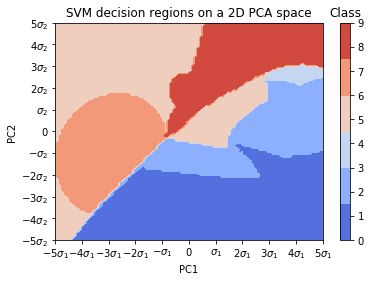

In [6]:
# Q2.4
def iaml01cw2_q2_4():
    svm = SVC()
    svm.fit(Xtrn_nm, Ytrn)

    #Find PC and std.dev
    pca = PCA(n_components=2)
    pca.fit(Xtrn_nm)
    comp = pca.components_
    var1 = pca.explained_variance_[0]
    var2 = pca.explained_variance_[1]
    sd1 = math.sqrt(var1)
    sd2 = math.sqrt(var2)
    
    # make 2 100x100 grids, then combine them to form new grid
    g1, g2 = np.mgrid[-5*sd1:5*sd1:0.101*sd1, -5*sd2:5*sd2:0.101*sd2]
    grid = np.vstack((g1.ravel(), g2.ravel())).T
    #print(g1.shape)
    #print(grid.shape)

    #project grid points onto new space
    xgrid = np.dot(grid, comp)
    preds = svm.predict(xgrid).reshape(g1.shape)
    #print(np.unique(preds))

    #plot decision regions
    fig = plt.figure()
    plt.title("SVM decision regions on a 2D PCA space")
    plt.contourf(g1, g2, preds, cmap='coolwarm')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    clb = plt.colorbar(ticks=np.unique(preds))
    clb.ax.set_title('Class')

    #set axis labels,scale
    plt.xticks([-5*sd1, -4*sd1, -3*sd1, -2*sd1, -1*sd1, 0, sd1, 2*sd1, 3*sd1, 4*sd1, 5*sd1],
            ["$-5\sigma_{1}$", "$-4\sigma_{1}$", "$-3\sigma_{1}$", "$-2\sigma_{1}$", "$-\sigma_{1}$", "0", "$\sigma_{1}$", "$2\sigma_{1}$", "$3\sigma_{1}$", "$4\sigma_{1}$", "$5\sigma_{1}$"])
    plt.yticks([-5*sd2, -4*sd2, -3*sd2, -2*sd2, -1*sd2, 0, sd2, 2*sd2, 3*sd2, 4*sd2, 5*sd2],
            ["$-5\sigma_{2}$", "$-4\sigma_{2}$", "$-3\sigma_{2}$", "$-2\sigma_{2}$", "$-\sigma_{2}$", "0", "$\sigma_{2}$", "$2\sigma_{2}$", "$3\sigma_{2}$", "$4\sigma_{2}$", "$5\sigma_{2}$"])

    plt.show()
iaml01cw2_q2_4()   # comment this out when you run the function

Mean accuracy 0.648 with C: 0.01
Mean accuracy 0.691 with C: 0.03593813663804628
Mean accuracy 0.737 with C: 0.1291549665014884
Mean accuracy 0.784 with C: 0.464158883361278
Mean accuracy 0.820 with C: 1.6681005372000592
Mean accuracy 0.845 with C: 5.994842503189409
Mean accuracy 0.857 with C: 21.544346900318846
Mean accuracy 0.854 with C: 77.42636826811278
Mean accuracy 0.850 with C: 278.2559402207126
Mean accuracy 0.841 with C: 1000.0


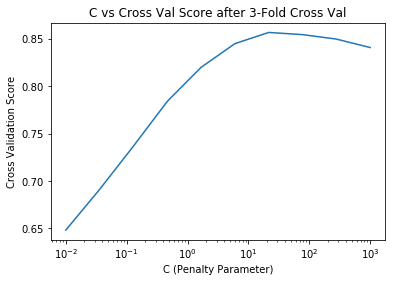

In [7]:
# Q2.5
def iaml01cw2_q2_5():
    #first 1000 samples from each class
    Xsmall = []
    Ysmall = []
    for i in range(10):
        idx = 0
        cc = 0
        while (cc < 1000): #change to 1000
            if (Ytrn[idx] == i):
                Xsmall.append(Xtrn_nm[idx])
                Ysmall.append(i)
                cc += 1
            idx += 1
        #print(len(Ysmall))
        
    Cs = np.logspace(-2,3,10)#change to 10
    means= []
    for c in Cs:
        svm = SVC(kernel ='rbf',gamma='auto', C=c) #fit to training data
        acc = cross_val_score(svm, Xsmall, Ysmall, cv=3) #no Ysmall here
        means.append(np.mean(acc))
        print('Mean accuracy {:.3f} with C: {}'.format(np.mean(acc), c))
    plt.plot(Cs, means)
    plt.title('C vs Cross Val Score after 3-Fold Cross Val')
    plt.xlabel('C (Penalty Parameter)')
    plt.ylabel('Cross Validation Score')
    plt.xscale('log')
        
iaml01cw2_q2_5()   # comment this out when you run the function

In [3]:
# Q2.6 
def iaml01cw2_q2_6():
    svm = SVC(C=21.544)
    svm.fit(Xtrn_nm, Ytrn)
    trainAcc = svm.score(Xtrn_nm, Ytrn) 
    testAcc  = svm.score(Xtst_nm, Ytst)
    print("Training classification accuracy: {:.3f}".format(trainAcc))
    print("Testing classification accuracy: {:.3f}".format(testAcc))

iaml01cw2_q2_6()   # comment this out when you run the function

Training classification accuracy: 0.908
Testing classification accuracy: 0.876
